### Access libraries that will be used

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored

### Load file into data frame and inspect for adequacy

In [6]:
pd.set_option('display.max_rows', None)
magic=pd.read_csv(r'p:\\stats.csv')
magic.head()

,FirstName,LastName,Age,Pos,Date,Tm,H/A,Opp,Outcome,PTS,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,GmSc,BPM
0,Nikola,Vucevic,30-084,C,1/16/2021,ORL,@,BRK,L,34,...,4,6,10,7,5,0,4,4,33.1,18.5
1,Nikola,Vucevic,30-066,C,12/29/2020,ORL,@,OKC,W,28,...,3,7,10,5,1,0,1,0,27.9,13.7
2,Nikola,Vucevic,30-077,C,1/9/2021,ORL,@,DAL,L,30,...,3,12,15,2,2,0,0,3,26.7,14.5
3,Nikola,Vucevic,30-070,C,1/2/2021,ORL,NaN,OKC,L,30,...,2,11,13,2,0,0,1,1,25.2,13.0
4,Nikola,Vucevic,30-072,C,1/4/2021,ORL,NaN,CLE,W,23,...,2,6,8,2,2,3,0,0,24.1,18.8


In [7]:
magic.tail()

,FirstName,LastName,Age,Pos,Date,Tm,H/A,Opp,Outcome,PTS,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,GmSc,BPM
148,Mohamed,Bamba,22-239,C,1/6/2021,ORL,NaN,CLE,W,0,...,0,1,1,0,0,0,0,2,-1.9,-37.7
149,Michael,Carter-Williams,29-086,G,1/4/2021,ORL,NaN,CLE,W,0,...,1,0,1,3,0,1,2,2,-2.1,-11.8
150,Gary,Clark,26-053,F,1/8/2021,ORL,@,HOU,L,0,...,0,4,4,0,0,1,2,1,-2.6,-15.8
151,Gary,Clark,26-063,F,1/18/2021,ORL,@,NYK,L,0,...,0,2,2,0,0,1,0,1,-2.6,-15.3
152,Dwayne,Bacon,25-141,G,1/18/2021,ORL,@,NYK,L,2,...,0,1,1,1,0,0,1,5,-4.5,-18.3


### Display data using histogram, swarmplot, and boxplot

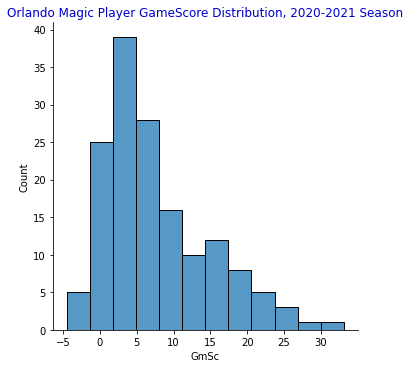

In [8]:
sns.displot(magic['GmSc'])
plt.title("Orlando Magic Player GameScore Distribution, 2020-2021 Season", color='mediumblue')
plt.show()

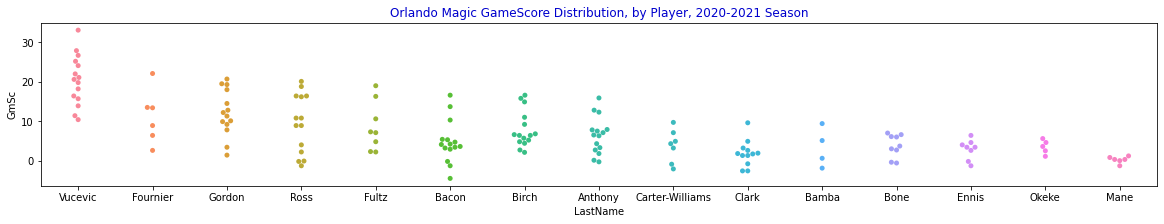

In [9]:
fig, ax = plt.subplots(figsize=(20,3))
sns.swarmplot(x="LastName", y="GmSc", data=magic)
plt.title("Orlando Magic GameScore Distribution, by Player, 2020-2021 Season", color='mediumblue')
plt.show()

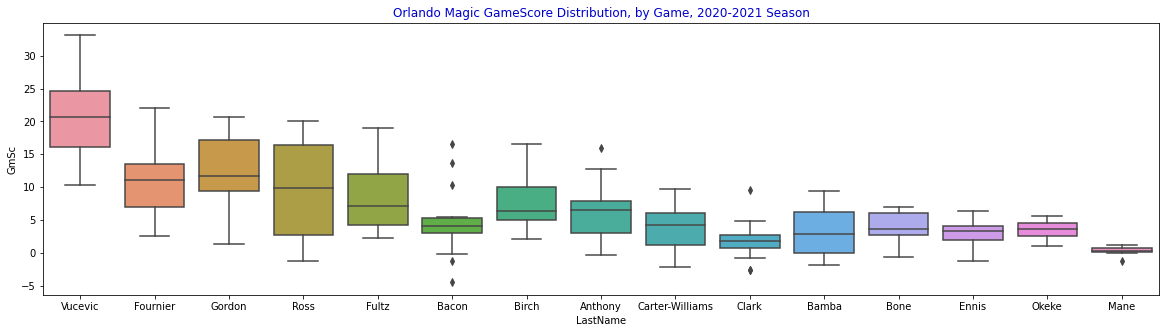

In [10]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x="LastName", y="GmSc", data=magic)
plt.title("Orlando Magic GameScore Distribution, by Game, 2020-2021 Season", color='mediumblue')
plt.show()

GameScore versus Minutes Played, by Player


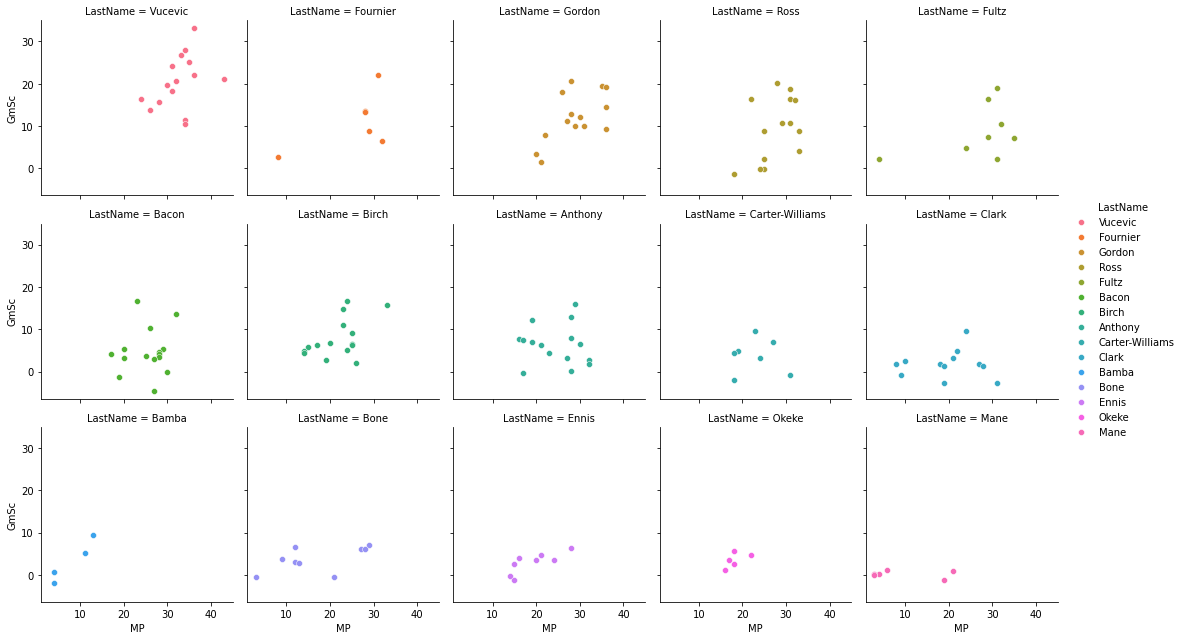

In [11]:
grid = sns.FacetGrid(magic, col = 'LastName', hue = 'LastName', col_wrap=5)
grid.map(sns.scatterplot, 'MP', 'GmSc')
grid.add_legend()
print ("\033[1m"+(colored("GameScore versus Minutes Played, by Player", 'blue'))+"\033[0m")
plt.show() 
# Minutes played on x-axis, GameScore on y-axis

c:\software\wpy64-3860\python-3.8.6.amd64\lib\site-packages\seaborn\axisgrid.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(**kwargs)


GameScore versus Date Game Played, by GmSc Rank


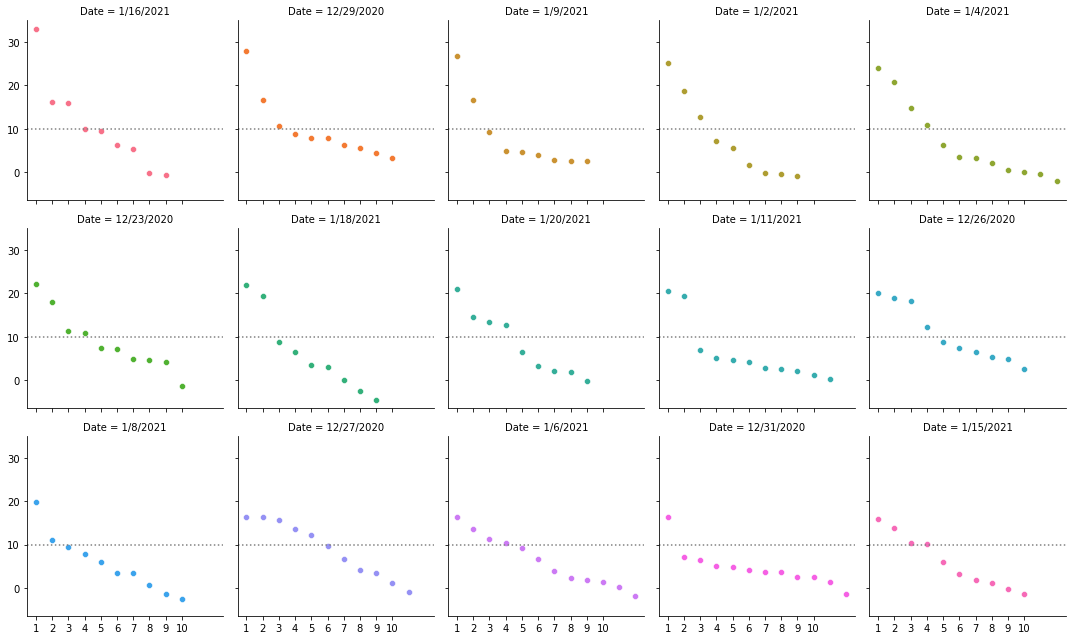

In [12]:
grid = sns.FacetGrid(magic, col = 'Date', hue = 'Date', col_wrap=5)
grid.map(sns.scatterplot, 'LastName', 'GmSc')
grid.set(xlabel="Player", ylabel="GameScore")
grid.set(xticklabels=[1,2,3,4,5,6,7,8,9,10,11])
grid.map(plt.axhline, y=10, ls=":", c=".5")
print ("\033[1m"+(colored("GameScore versus Date Game Played, by GmSc Rank", 'blue'))+"\033[0m")
plt.show() 
# x-axis shows highest GmSc on left, lowest on right for each game. Games ordered by highest game score (in the #1 position on x-axis)
# GmSc of >= 10 are considered above average performace. Points above the dashed line are 'above average'performances.

### Calculate each player's average gamescore, standard dev., and quartiles

In [13]:
print ("\033[1m"+(colored("Descriptive Statistics for GameScore, by Player", 'blue'))+"\033[0m")
magic[['LastName','GmSc']].\
groupby(['LastName'], as_index=True).describe()

Descriptive Statistics for GameScore, by Player


GmSc                                                        
                count       mean       std   min     25%    50%     75%   max
LastName                                                                     
Anthony          15.0   6.400000  4.670577  -0.3   3.000   6.50   7.850  15.9
Bacon            15.0   4.760000  5.401164  -4.5   3.050   4.10   5.350  16.6
Bamba             4.0   3.300000  4.992661  -1.9  -0.025   2.85   6.175   9.4
Birch            15.0   7.906667  4.632720   2.1   5.000   6.40  10.100  16.6
Bone              9.0   3.788889  2.895447  -0.6   2.700   3.70   6.100   7.0
Carter-Williams   7.0   3.742857  4.171274  -2.1   1.150   4.30   6.000   9.7
Clark            12.0   1.858333  3.289227  -2.6   0.775   1.75   2.750   9.6
Ennis             8.0   2.862500  2.512220  -1.3   1.900   3.40   4.150   6.4
Fournier          6.0  11.150000  6.800221   2.6   7.025  11.15  13.475  22.1
Fultz             8.0   8.700000  6.215189   2.2   4.175   7.20  12.025  19.0
Gordon           14.0  12.150000  5.871411   1.4   9.375  11.75  17.125  20.7
Mane              6.0   0.216667  0.856543  -1.3   0.075   0.30   0.675   1.2
Okeke             5.0   3.480000  1.759830   1.1   2.500   3.60   4.600   5.6
Ross             14.0   9.421429  7.490525  -1.3   2.650   9.85  16.350  20.1
Vucevic          15.0  20.433333  6.344702  10.4  16.050  20.60  24.650  33.1

In [14]:
print ("\033[1m"+(colored("Total Season GameScore, by Player", 'blue'))+"\033[0m")
game_score = magic[['GmSc','LastName']].groupby(['LastName'], as_index=True).sum()
sort_game_score = game_score.sort_values(by=['GmSc'], ascending=False)
print(sort_game_score)

Total Season GameScore, by Player
                  GmSc
LastName              
Vucevic          306.5
Gordon           170.1
Ross             131.9
Birch            118.6
Anthony           96.0
Bacon             71.4
Fultz             69.6
Fournier          66.9
Bone              34.1
Carter-Williams   26.2
Ennis             22.9
Clark             22.3
Okeke             17.4
Bamba             13.2
Mane               1.3
